In [1]:
import pandas as pd # primary data structure library

# getting data
df = pd.read_excel(r"test2.xlsx",delimiter =';',decimal=",",sheet_name="1")
cols = [0,2,4,5,6,8,10,11,12,14,16,17]
df.drop(df.columns[cols], axis=1, inplace=True)

#rename columns
df.rename(columns={'Dmm1_Time(s)(1)(1)':'Time1', 'mV':'Voltage1',
                  'Dmm1_Time(s)(1)(1).1':'Time2', 'mV.1':'Voltage2',
                  'Dmm1_Time(s)(1)(1).2':'Time3', 'mV.2':'Voltage3'}, inplace=True)

#cutting rows above 260
df=df[:260] 

/home/jupyterlab/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


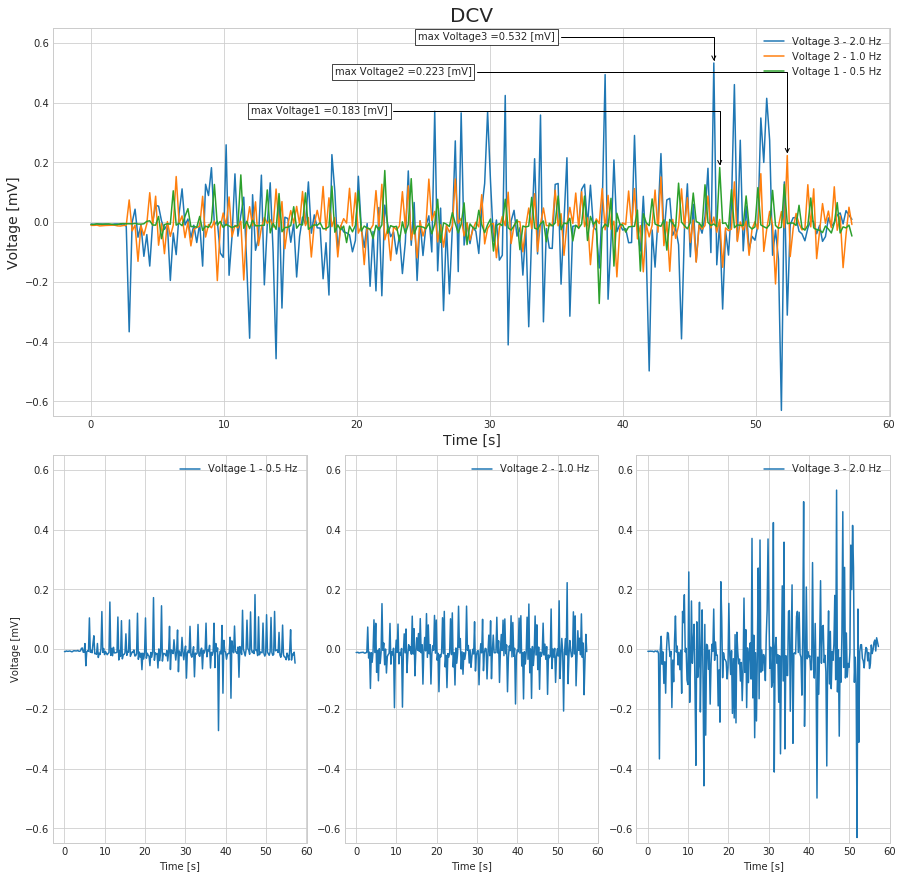

In [86]:
import numpy as np
%matplotlib inline

from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Time = df['Time1']
V1=df['Voltage1']
V2=df['Voltage2']
V3=df['Voltage3']

fig = plt.figure()
gs = gridspec.GridSpec(2, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1 = fig.add_subplot(gs[0,:])
ax1.plot(Time, V3, label='Voltage 3 - 2.0 Hz')
ax1.plot(Time, V2, label='Voltage 2 - 1.0 Hz')
ax1.plot(Time, V1, label='Voltage 1 - 0.5 Hz')

plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('Voltage [mV]',fontsize=14)
plt.title('DCV',fontsize=20)
plt.legend()
plt.ylim(-0.65, 0.65)
annot_max(Time,V1,0.4,0.8)
annot_max(Time,V2,0.5,0.9)
annot_max(Time,V3,0.6,0.99)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(Time, V1, label='Voltage 1 - 0.5 Hz')
plt.xlabel('Time [s]',fontsize=10)
plt.ylabel('Voltage [mV]',fontsize=10)
plt.legend()
plt.ylim(-0.65, 0.65)

ax3 = fig.add_subplot(gs[1,1])
ax3.plot(Time, V2, label='Voltage 2 - 1.0 Hz')
plt.xlabel('Time [s]',fontsize=10)
#plt.ylabel('Voltage [mV]',fontsize=10)
plt.legend()
plt.ylim(-0.65, 0.65)

ax4 = fig.add_subplot(gs[1,2])
ax4.plot(Time, V3, label='Voltage 3 - 2.0 Hz')
plt.xlabel('Time [s]',fontsize=10)
#plt.ylabel('Voltage [mV]',fontsize=10)
plt.legend()
plt.ylim(-0.65, 0.65)
#plt.setp(ax4.get_yticklabels(), visible=False)

gs.update(wspace=0.15, hspace=0.1)


def annot_max(x, y, xt, yt ,ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "max {:s} ={:.3f} [mV]".format(y.name, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xt,yt), **kw)


###### 